<a href="https://colab.research.google.com/github/Niushamesgari/Deep-learning-project/blob/main/kangaroowallaby_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="0TmfXz3UZSSiUMPMstoB")
project = rf.workspace("rakshit-taneja").project("kit315kangaroowallaby")
version = project.version(3)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to KIT315kangaroowallaby-3 in yolov8:: 100%|██████████| 2324/2324 [00:00<00:00, 2537.83it/s]


In [2]:
config_file_template = '''
names:
- kangaroo
- wallaby
nc: 2
roboflow:
  license: Public Domain
  project: kit315kangaroowallaby
  url: https://universe.roboflow.com/rakshit-taneja/kit315kangaroowallaby/dataset/3
  version: 3
  workspace: rakshit-taneja
test: /content/KIT315kangaroowallaby-3/test/images
train: /content/KIT315kangaroowallaby-3/train/images
val: /content/KIT315kangaroowallaby-3/valid/images


'''

with open('/content/KIT315kangaroowallaby-3/data.yaml', 'w') as f:
    f.write(config_file_template)

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [4]:
from ultralytics import YOLO
model = YOLO('yolov8n.yaml').load('yolov8n.pt')
  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/KIT315kangaroowallaby-3/data.yaml', epochs=8, imgsz=(640))

100%|██████████| 6.25M/6.25M [00:00<00:00, 117MB/s]

Transferred 355/355 items from pretrained weights


Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/KIT315kangaroowallaby-3/data.yaml, epochs=8, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/KIT315kangaroowallaby-3/train/labels... 809 images, 0 backgrounds, 0 corrupt: 100%|██████████| 809/809 [00:01<00:00, 420.01it/s]

train: New cache created: /content/KIT315kangaroowallaby-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/KIT315kangaroowallaby-3/valid/labels... 231 images, 0 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<00:00, 433.93it/s]

val: New cache created: /content/KIT315kangaroowallaby-3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 8 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/8         0G      1.414      2.419      1.801         24        640: 100%|██████████| 51/51 [10:55<00:00, 12.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:17<00:00,  9.68s/it]

                   all        231        296      0.652     0.0575      0.438      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/8         0G      1.455      2.024      1.766         24        640: 100%|██████████| 51/51 [10:47<00:00, 12.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:09<00:00,  8.75s/it]

                   all        231        296      0.338      0.236      0.202     0.0822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/8         0G      1.452      2.002      1.786         29        640: 100%|██████████| 51/51 [10:52<00:00, 12.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:10<00:00,  8.87s/it]

                   all        231        296      0.507       0.46      0.439      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/8         0G      1.439      1.842      1.755         25        640: 100%|██████████| 51/51 [10:35<00:00, 12.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:07<00:00,  8.43s/it]

                   all        231        296      0.488      0.433      0.422      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/8         0G      1.416      1.754      1.729         20        640: 100%|██████████| 51/51 [10:48<00:00, 12.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:12<00:00,  9.05s/it]

                   all        231        296       0.62      0.534      0.607      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/8         0G      1.344      1.632      1.681         27        640: 100%|██████████| 51/51 [10:45<00:00, 12.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:09<00:00,  8.72s/it]

                   all        231        296      0.604      0.738      0.702      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/8         0G      1.306      1.529      1.642         31        640: 100%|██████████| 51/51 [10:42<00:00, 12.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:09<00:00,  8.63s/it]

                   all        231        296        0.7      0.684      0.747      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/8         0G      1.281      1.513      1.609         15        640: 100%|██████████| 51/51 [10:40<00:00, 12.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:11<00:00,  9.00s/it]

                   all        231        296        0.7      0.713      0.775      0.426



8 epochs completed in 1.598 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:04<00:00,  8.04s/it]


                   all        231        296      0.699      0.713      0.774      0.426
              kangaroo        122        170      0.831      0.576      0.781      0.394
               wallaby        109        126      0.568      0.849      0.768      0.459
Speed: 6.5ms preprocess, 257.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


In [5]:
model.export()

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)

TorchScript: starting export with torch 2.3.1+cu121...
TorchScript: export success ✅ 2.6s, saved as 'runs/detect/train/weights/best.torchscript' (11.9 MB)

Export complete (4.8s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 data=/content/KIT315kangaroowallaby-3/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.torchscript'


0: 640x640 1 wallaby, 663.4ms
1: 640x640 1 wallaby, 663.4ms
2: 640x640 2 wallabys, 663.4ms
3: 640x640 5 wallabys, 663.4ms
Speed: 9.6ms preprocess, 663.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


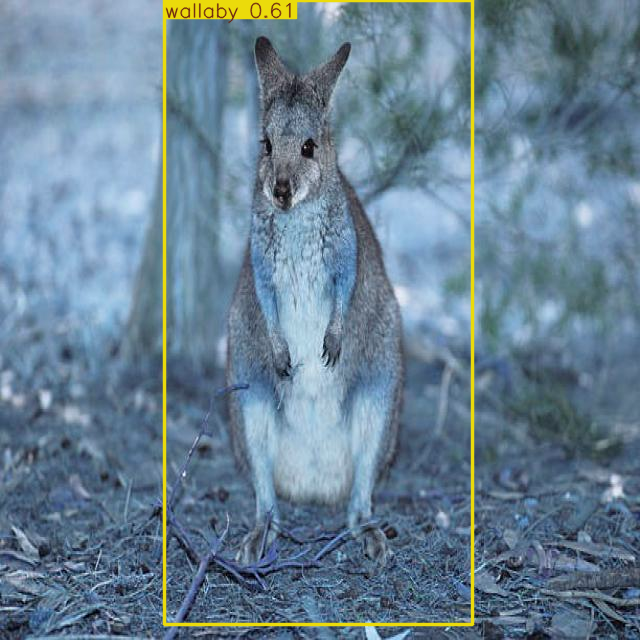

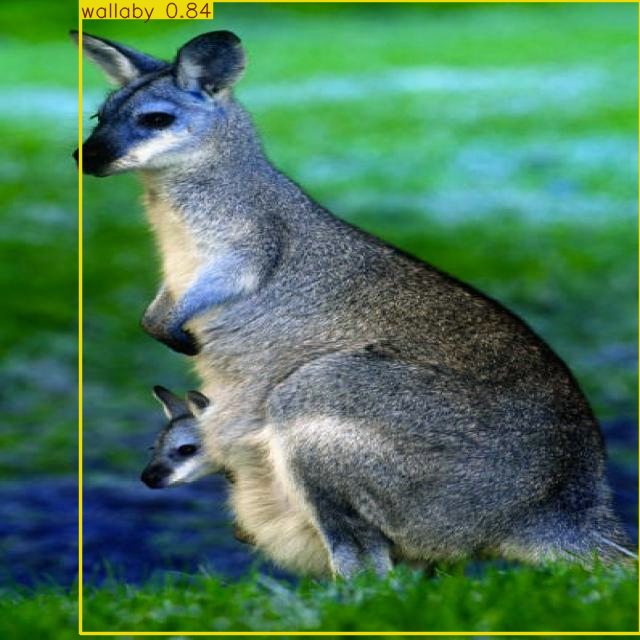

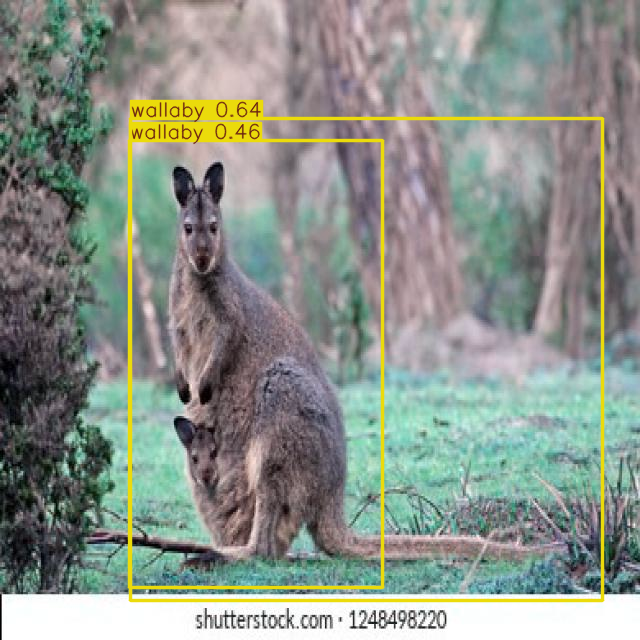

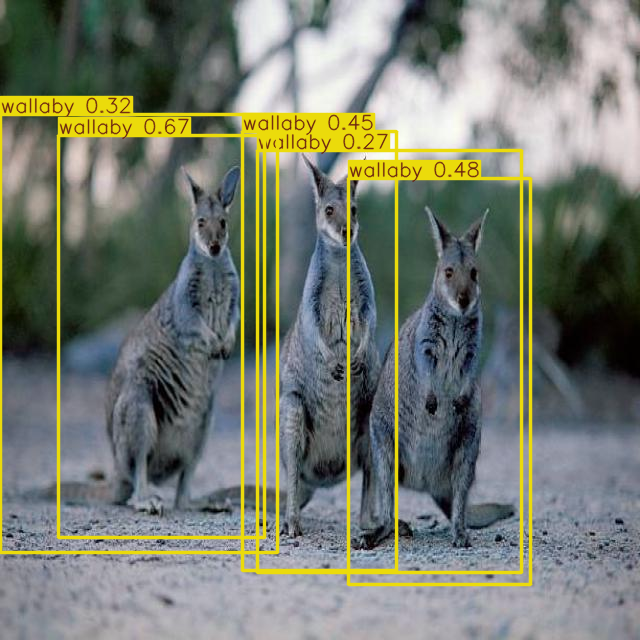

In [8]:
import glob
from PIL import Image
test_image=glob.glob('/content/KIT315kangaroowallaby-3/test/images/*.jpg')
results=model(test_image[4:8],stream=False)
for i in range(4):
    res=results[i].plot()
    display(Image.fromarray(res))

In [9]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [10]:
!pip install --upgrade gradio==4.29

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i

In [32]:
import gradio as gr
from PIL import Image

# Define the image detection function
def detect_img(img):
    results = model([img], stream=False)
    res = results[0].plot()
    return Image.fromarray(res)

# Define the theme
theme = gr.themes.Soft(
    primary_hue="slate",
    secondary_hue="blue",
    neutral_hue="gray"
)

# Create the Gradio interface
with gr.Blocks(theme=gr.themes.Default(GoogleFont ="Arial", ,spacing_size=gr.themes.sizes.spacing_sm, radius_size=gr.themes.sizes.radius_none)) as demo:
    demo = gr.Interface(
        fn=detect_img,
        inputs=[gr.Image(type='pil')],
        outputs=[gr.Image(type='pil')],
        theme=theme,
        title="Kangaroo & Wallaby Detection ML App",
        examples= test_image[10:15]
    )

In [ ]:
demo.launch(debug=True,share=True)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://b930e2d3a916e3e096.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


https://universe.roboflow.com/rakshit-taneja/kit315kangaroowallaby/dataset/3